## Exploratory Data Analysis of Forecast Data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# check current working directory
os.getcwd()

'/home/anupam9k/AI_Resume_Projects/02. Smart_Forecasting_&_Churn_AI/research_notebooks/01. Forecast'

In [6]:
# change to the project directory
os.chdir("../")

In [7]:
%pwd

'/home/anupam9k/AI_Resume_Projects/02. Smart_Forecasting_&_Churn_AI'

In [8]:
df = pd.read_csv('research_notebooks/Data/forecast_data_v2.csv')

### Load Top 5 Rows

In [9]:
df.head()

,Marketing_Spend,Seasonality_Index,Product_Price,Promotion_Discount,Competitor_Price,Region,Product_Category,Channel_Type,Festival_Week,Store_Type,Weekly_Sales
0,4370.86,1.08,35.43,0.08,33.77,North,Electronics,Online,No,Flagship,682
1,9556.43,1.03,51.28,0.05,54.78,South,Furniture,In-store,No,Flagship,864
2,7587.95,0.85,18.93,0.07,13.97,East,Grocery,In-store,No,Flagship,1005
3,6387.93,0.99,50.22,0.24,49.40,North,Grocery,Online,No,Online-only,770
4,2404.17,0.87,28.28,0.44,34.36,North,Electronics,In-store,No,Franchise,596


Analysis of the shape of the dataset is also important to understand the dataset.

In [10]:
df.shape

(100000, 11)

As we can witness, ther are 100,000 rows and 11 columns in the dataset.

Let's conduct a procedural analysis of the dataset. This process includes:
- Assessing missing values in the dataset
- Detecting duplicate entries in the dataset
- Examining the data type of each column
- Determining the count of unique values in each column
- Investigating the categories within the categorical columns
- Reviewing summary statistics of the dataset

### Assessing Mising Values

In [11]:
df.isnull().sum()

Marketing_Spend       0
Seasonality_Index     0
Product_Price         0
Promotion_Discount    0
Competitor_Price      0
Region                0
Product_Category      0
Channel_Type          0
Festival_Week         0
Store_Type            0
Weekly_Sales          0
dtype: int64

The dataset has no missing values.

### Detecting Duplicate Entries

In [12]:
df.duplicated().sum()

np.int64(0)

We can find no duplicate entries in the dataset.

### Examining the data type of each column

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Marketing_Spend     100000 non-null  float64
 1   Seasonality_Index   100000 non-null  float64
 2   Product_Price       100000 non-null  float64
 3   Promotion_Discount  100000 non-null  float64
 4   Competitor_Price    100000 non-null  float64
 5   Region              100000 non-null  object 
 6   Product_Category    100000 non-null  object 
 7   Channel_Type        100000 non-null  object 
 8   Festival_Week       100000 non-null  object 
 9   Store_Type          100000 non-null  object 
 10  Weekly_Sales        100000 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 8.4+ MB


There are
- 5 columns with float64 data type
- 5 columns with object data type
- 1 column with int64 data type

### Determining the Count of unique Values in Each Column

In [14]:
df.nunique()

Marketing_Spend       94560
Seasonality_Index       101
Product_Price          9001
Promotion_Discount       51
Competitor_Price      10577
Region                    4
Product_Category          5
Channel_Type              2
Festival_Week             2
Store_Type                3
Weekly_Sales            834
dtype: int64

### Investigating the Categories amd numeric values within the Categorical and Numeric Columns respectively

In [15]:
# Extracting categorical features
cat_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:", cat_features)

# Extracting numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:", num_features)

Categorical Features: Index(['Region', 'Product_Category', 'Channel_Type', 'Festival_Week',
       'Store_Type'],
      dtype='object')
Numerical Features: Index(['Marketing_Spend', 'Seasonality_Index', 'Product_Price',
       'Promotion_Discount', 'Competitor_Price', 'Weekly_Sales'],
      dtype='object')


In [16]:
for features in cat_features:
    print(f"{features}: {df[features].unique()}\n")

Region: ['North' 'South' 'East' 'West']

Product_Category: ['Electronics' 'Furniture' 'Grocery' 'Toys' 'Apparel']

Channel_Type: ['Online' 'In-store']

Festival_Week: ['No' 'Yes']

Store_Type: ['Flagship' 'Online-only' 'Franchise']



Above is the list of values in each categorical feature.

### Reviewing Summary Statistics of the Dataset

In [17]:
df.describe()

,Marketing_Spend,Seasonality_Index,Product_Price,Promotion_Discount,Competitor_Price,Weekly_Sales
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5495.394264,1.001322,55.056184,0.249492,55.060092,681.428380
std,2595.073035,0.288730,25.992850,0.144347,26.452113,149.546199
min,1000.050000,0.500000,10.000000,0.000000,-5.870000,221.000000
25%,3245.917500,0.750000,32.530000,0.120000,32.580000,567.000000
50%,5505.670000,1.000000,55.100000,0.250000,55.150000,682.000000
75%,7745.625000,1.250000,77.540000,0.370000,77.522500,796.000000
max,9999.930000,1.500000,100.000000,0.500000,116.330000,1139.000000


### Let us assess the correlation between the features

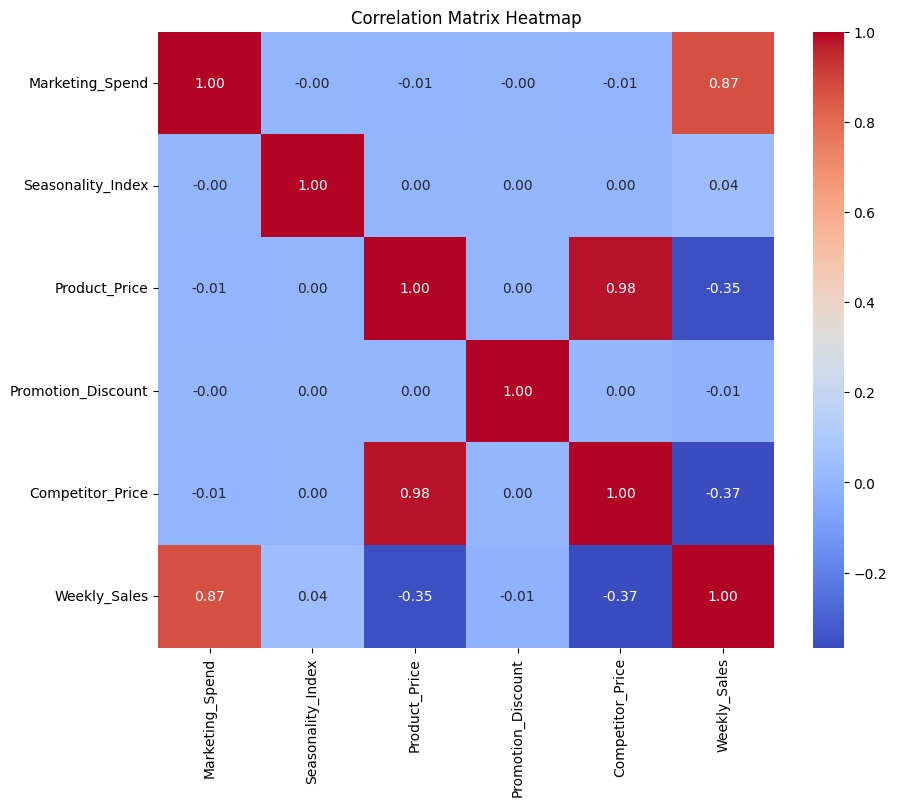

In [18]:
corr = df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Chi-Square Test

Let us perform the Chi-Square Test to assess the association between categorical features

In [19]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(df, feature1, feature2):

    contingency_table = pd.crosstab(df[feature1], df[feature2])

    # Observed values
    observed_values = contingency_table.values

    # Expected values
    _, _, _, expected_values = chi2_contingency(contingency_table)

    # Degrees of Freedom
    no_of_rows = len(contingency_table.iloc[0:, 0])
    no_columns = len(contingency_table.iloc[0, 0:])
    deg_f = (no_of_rows - 1) * (no_columns - 1)

    print(f"Degrees of Freedom: {deg_f}")

    # Significancve Level 5%
    alpha = 0.05
    print(f"Significance Level: {alpha}")

    # Chi-Square Statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    
    print(f"Chi-Square Statistic: {chi_square_statistic}")

    # Critical Value
    critical_value = chi2.ppf(q =1-alpha, df = deg_f)

    # P-Values
    p_value = 1-chi2.cdf(x = chi_square_statistic, df = deg_f)

    print(f"P-Value: {p_value}")

    print("As per the Chi-Square Test, we can conclude that:")
    if chi_square_statistic >= critical_value:
        print("Reject H0, there is a relationship between the two categorical features.")

    else: 
        print("Fail to reject H0, there is no relationship between the two categorical features.")
    
    print("\n")

    print("As per the P-Value, we can conclude that:")
    if p_value <= alpha:
        print("Reject H0, there is a relationship between the two categorical features.")
    else:
        print("Fail to reject H0, there is no relationship between the two categorical features.")

In [20]:
for x in cat_features:
    for i in cat_features:
        if i !=x:
            print("Chi-Square Test between {} and {}".format(x, i))
            chi_square_test(df = df, feature1=x, feature2=i)
            print("\n" + "="*50 + "\n")

Chi-Square Test between Region and Product_Category
Degrees of Freedom: 12
Significance Level: 0.05
Chi-Square Statistic: 3.727324042379652
P-Value: 0.987869365661934
As per the Chi-Square Test, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


As per the P-Value, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


Chi-Square Test between Region and Channel_Type
Degrees of Freedom: 3
Significance Level: 0.05
Chi-Square Statistic: 0.8859574844125231
P-Value: 0.8288152009510222
As per the Chi-Square Test, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


As per the P-Value, we can conclude that:
Fail to reject H0, there is no relationship between the two categorical features.


Chi-Square Test between Region and Festival_Week
Degrees of Freedom: 3
Significance Level: 0.05
Chi-Square Statistic: 2.722833002977508
P-Value: 0.43

As per the Chi Square test results, we can observe that there is no relationship between any of the categorical features.

Let us Perform ANOVA Test to check the relationship between categorical features and target variable

In [21]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

def perform_anova_test(x, y):
    df_anova = df[[x, y]].dropna()

    # Probability plots for normality check
    unique_groups = df_anova[x].unique()
    for group in unique_groups:
        stats.probplot(df_anova[df_anova[x] == group][y], dist="norm", plot=plt)
        plt.title(f"Probability Plot for {group}")
        plt.show()

    # Ratio of largest to smallest sample std dev
    group_std = df_anova.groupby(x)[y].std()
    ratio = group_std.max() / group_std.min()
    print(f"\nRatio of largest to smallest sample standard deviation: {ratio:.4f}")

    # ANOVA components
    group_sizes = df_anova.groupby(x)[y].count()
    group_means = df_anova.groupby(x)[y].mean()
    grand_mean = df_anova[y].mean()

    # Between group sum of squares (SSB)
    SSB = ((group_means - grand_mean)**2 * group_sizes).sum()

    # Within group sum of squares (SSW)
    SSW = df_anova.groupby(x).apply(lambda g: ((g[y] - g[y].mean())**2).sum()).sum()

    # Total sum of squares (SST)
    SST = ((df_anova[y] - grand_mean)**2).sum()

    # Degrees of freedom
    k = df_anova[x].nunique()
    N = len(df_anova)
    dfb = k - 1
    dfw = N - k

    # Mean Squares
    MSB = SSB / dfb
    MSW = SSW / dfw

    # F-statistic
    F = MSB / MSW

    # P-value
    p_value = 1 - stats.f.cdf(F, dfb, dfw)

    # F-critical
    alpha = 0.05
    F_crit = stats.f.ppf(1 - alpha, dfb, dfw)

    # Build ANOVA Table
    anova_table = pd.DataFrame({
        'Sum of Squares': [SSB, SSW, SST],
        'Degrees of Freedom': [dfb, dfw, dfb + dfw],
        'Mean Square': [MSB, MSW, SST / (N - 1)],
        'F-Statistic': [F, '', ''],
        'P-Value': [p_value, '', ''],
        'F-Critical': [F_crit, '', '']
    }, index=['Between Groups', 'Within Groups', 'Total'])

    print("\nANOVA Table:\n", anova_table)

    # Decision
    print("\nApproach 1: The P-Value approach to hypothesis testing in the decision rule")
    if p_value < alpha:
        print(f"F = {F:.4f}, F-critical = {F_crit:.4f} → 🔥 Reject the null hypothesis.")
    else:
        print(f"F = {F:.4f}, F-critical = {F_crit:.4f} → ❌ Failed to reject the null hypothesis.")


In [22]:
cat_features

Index(['Region', 'Product_Category', 'Channel_Type', 'Festival_Week',
       'Store_Type'],
      dtype='object')

In [23]:
num_features

Index(['Marketing_Spend', 'Seasonality_Index', 'Product_Price',
       'Promotion_Discount', 'Competitor_Price', 'Weekly_Sales'],
      dtype='object')

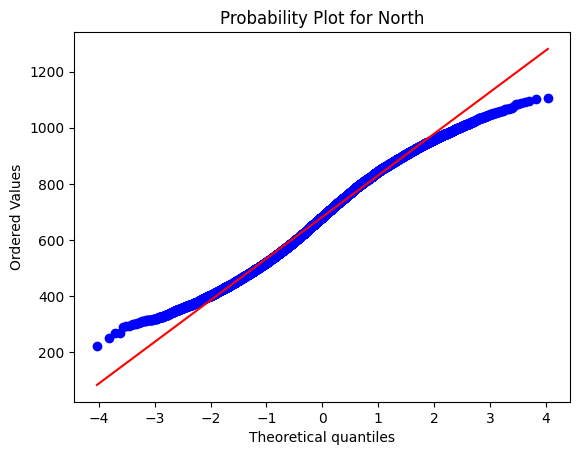

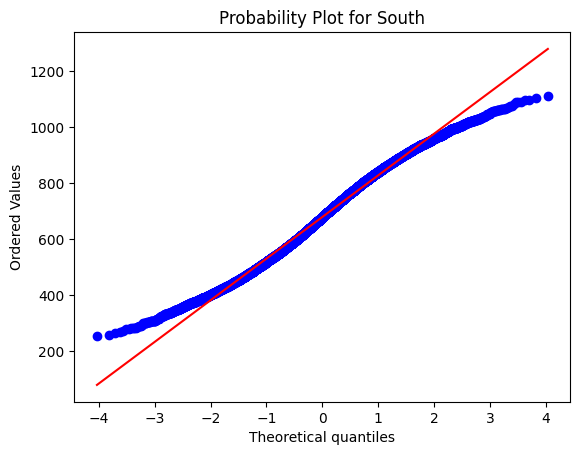

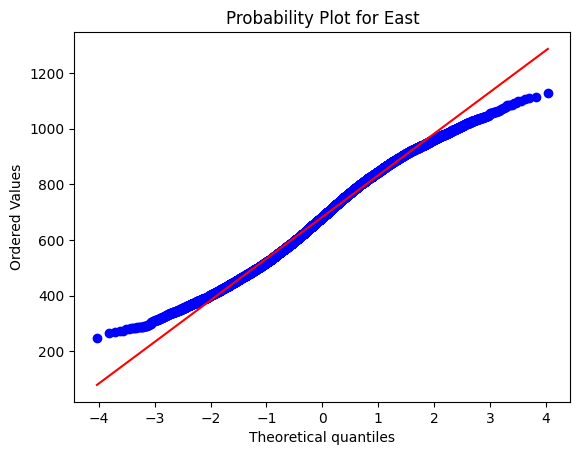

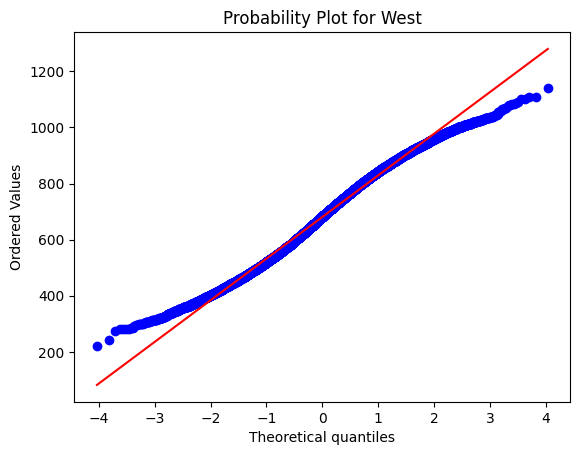


Ratio of largest to smallest sample standard deviation: 1.0081

ANOVA Table:
                 Sum of Squares  Degrees of Freedom   Mean Square F-Statistic  \
Between Groups    1.208641e+05                   3  40288.031904    1.801506   
Within Groups     2.236263e+09               99996  22363.527911               
Total             2.236384e+09               99999  22364.065651               

                P-Value F-Critical  
Between Groups  0.14447   2.604998  
Within Groups                       
Total                               

Approach 1: The P-Value approach to hypothesis testing in the decision rule
F = 1.8015, F-critical = 2.6050 → ❌ Failed to reject the null hypothesis.


In [25]:
# Perform ANOVA Test for Region and Weekly_Sales
perform_anova_test(x='Region', y='Weekly_Sales')

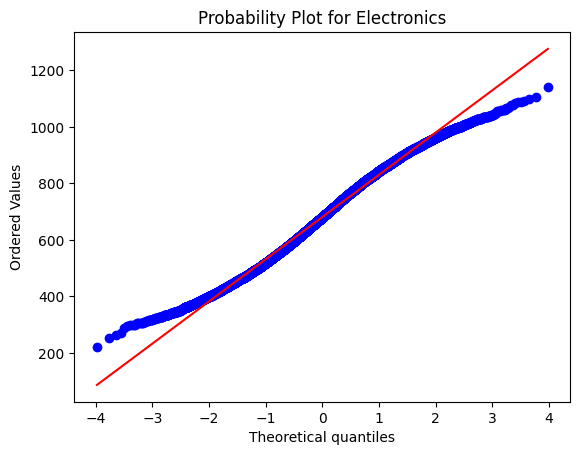

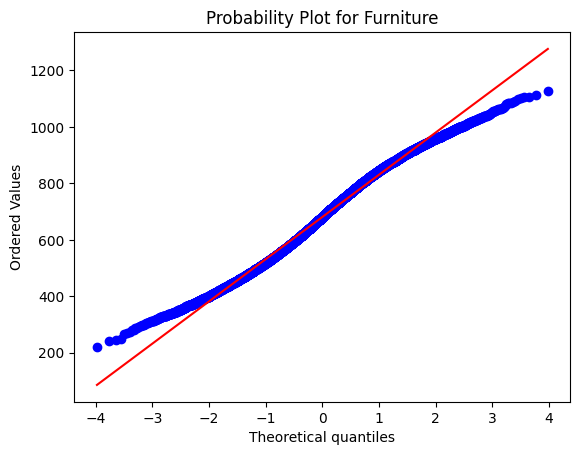

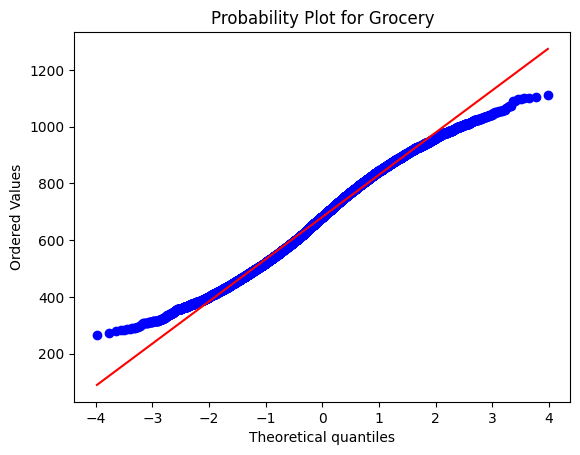

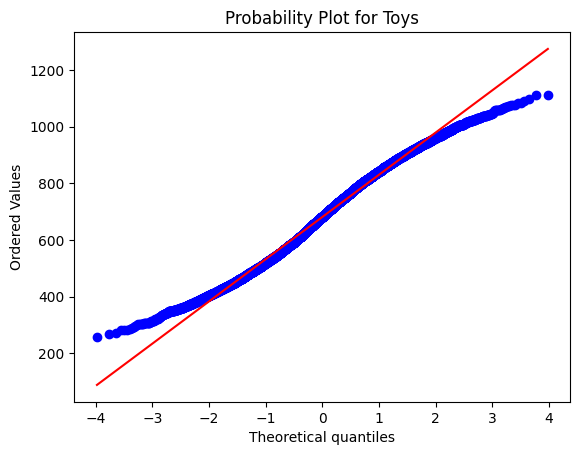

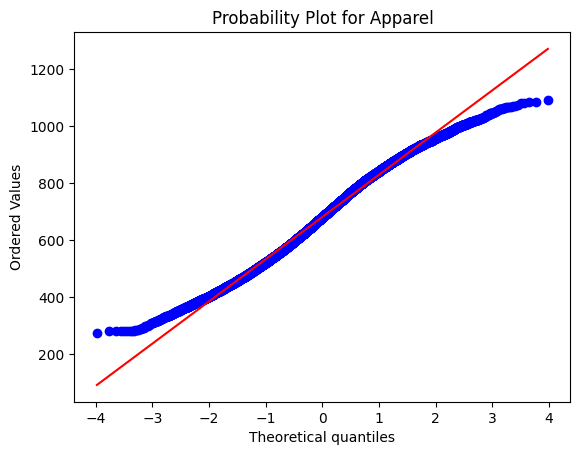


Ratio of largest to smallest sample standard deviation: 1.0104

ANOVA Table:
                 Sum of Squares  Degrees of Freedom   Mean Square F-Statistic  \
Between Groups    9.191150e+03                   4   2297.787594    0.102741   
Within Groups     2.236375e+09               99995  22364.868342               
Total             2.236384e+09               99999  22364.065651               

                 P-Value F-Critical  
Between Groups  0.981569   2.372021  
Within Groups                        
Total                                

Approach 1: The P-Value approach to hypothesis testing in the decision rule
F = 0.1027, F-critical = 2.3720 → ❌ Failed to reject the null hypothesis.


In [26]:
perform_anova_test(x='Product_Category', y='Weekly_Sales')

In [27]:
cat_features

Index(['Region', 'Product_Category', 'Channel_Type', 'Festival_Week',
       'Store_Type'],
      dtype='object')

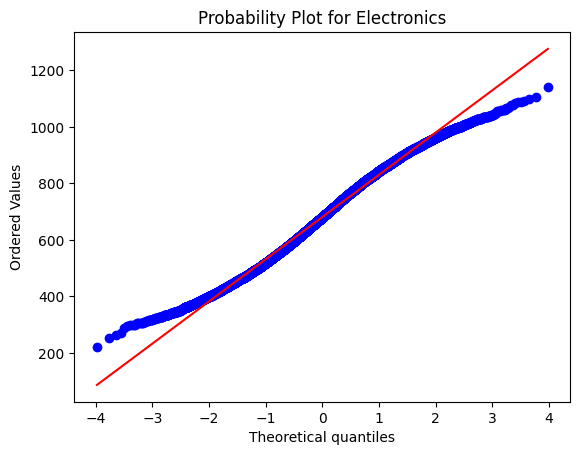

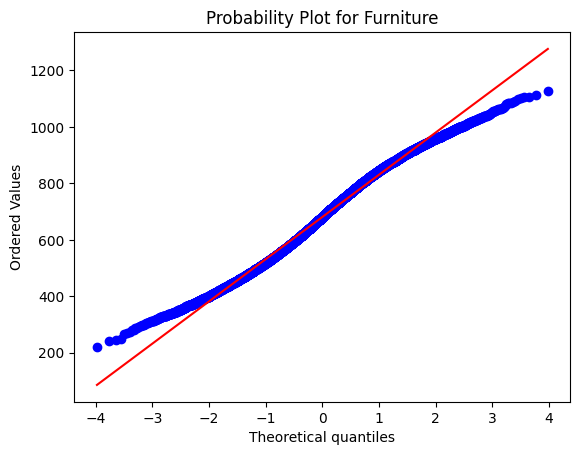

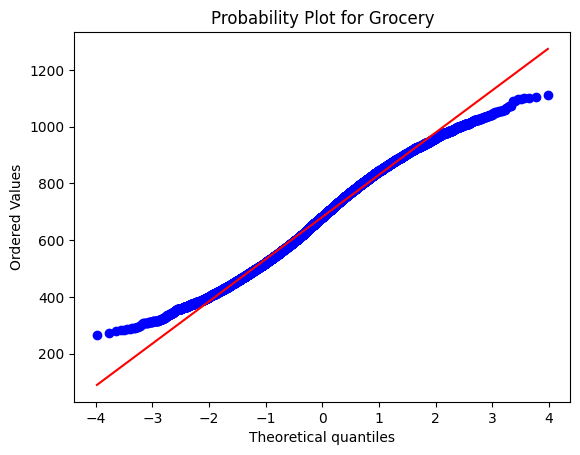

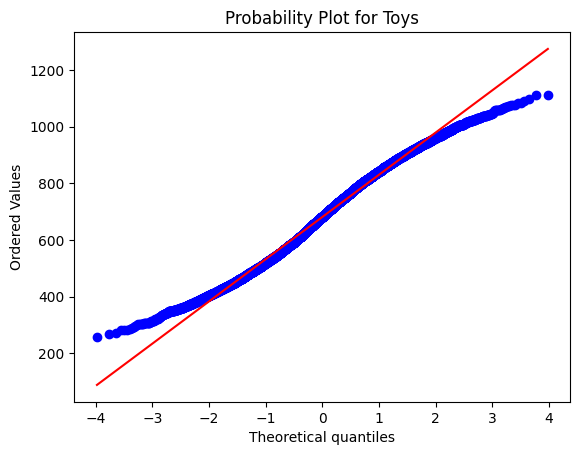

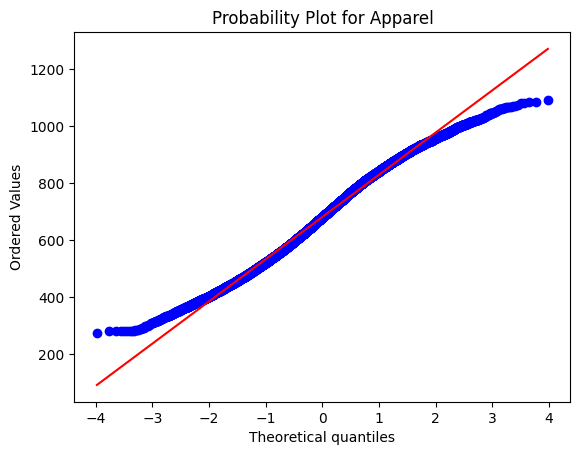


Ratio of largest to smallest sample standard deviation: 1.0104

ANOVA Table:
                 Sum of Squares  Degrees of Freedom   Mean Square F-Statistic  \
Between Groups    9.191150e+03                   4   2297.787594    0.102741   
Within Groups     2.236375e+09               99995  22364.868342               
Total             2.236384e+09               99999  22364.065651               

                 P-Value F-Critical  
Between Groups  0.981569   2.372021  
Within Groups                        
Total                                

Approach 1: The P-Value approach to hypothesis testing in the decision rule
F = 0.1027, F-critical = 2.3720 → ❌ Failed to reject the null hypothesis.


In [28]:
perform_anova_test(x='Product_Category', y='Weekly_Sales')

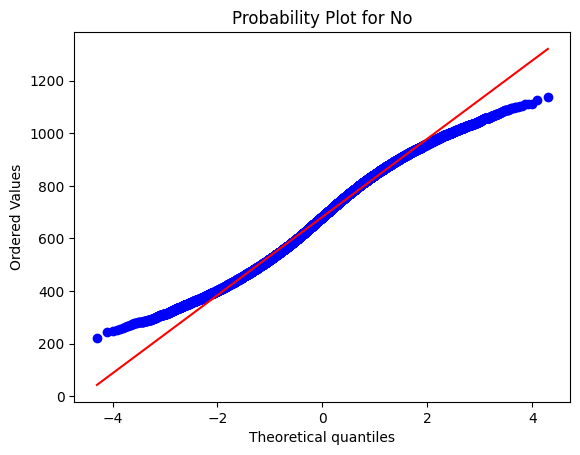

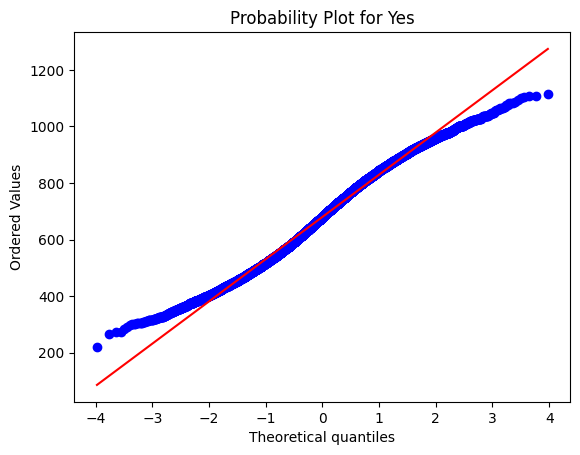


Ratio of largest to smallest sample standard deviation: 1.0044

ANOVA Table:
                 Sum of Squares  Degrees of Freedom   Mean Square F-Statistic  \
Between Groups    6.103614e+04                   1  61036.144750    2.729253   
Within Groups     2.236323e+09               99998  22363.678923               
Total             2.236384e+09               99999  22364.065651               

                 P-Value F-Critical  
Between Groups  0.098528   3.841552  
Within Groups                        
Total                                

Approach 1: The P-Value approach to hypothesis testing in the decision rule
F = 2.7293, F-critical = 3.8416 → ❌ Failed to reject the null hypothesis.


In [29]:
perform_anova_test(x='Festival_Week', y='Weekly_Sales')

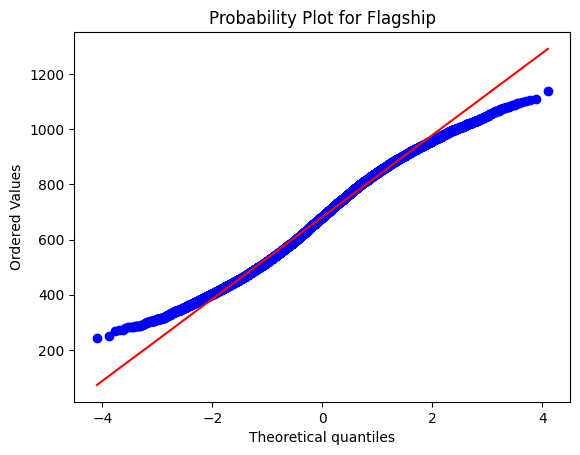

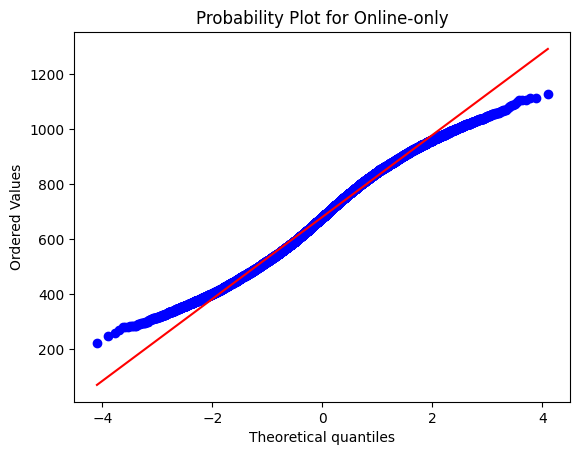

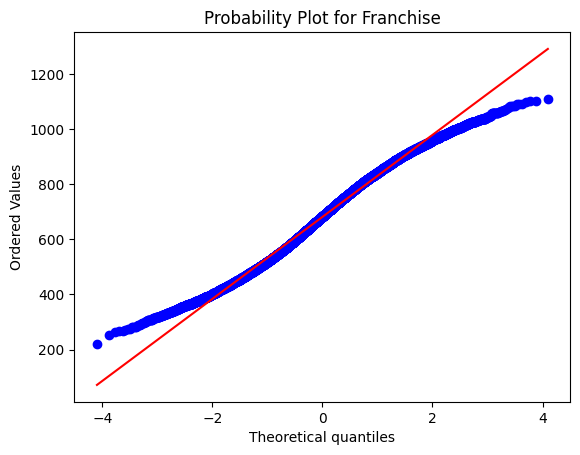


Ratio of largest to smallest sample standard deviation: 1.0036

ANOVA Table:
                 Sum of Squares  Degrees of Freedom   Mean Square F-Statistic  \
Between Groups    3.593050e+04                   2  17965.249212    0.803306   
Within Groups     2.236348e+09               99997  22364.153630               
Total             2.236384e+09               99999  22364.065651               

                 P-Value F-Critical  
Between Groups  0.447849   2.995822  
Within Groups                        
Total                                

Approach 1: The P-Value approach to hypothesis testing in the decision rule
F = 0.8033, F-critical = 2.9958 → ❌ Failed to reject the null hypothesis.


In [30]:
perform_anova_test(x='Store_Type', y='Weekly_Sales')

In [31]:
print(cat_features)
print(num_features)

Index(['Region', 'Product_Category', 'Channel_Type', 'Festival_Week',
       'Store_Type'],
      dtype='object')
Index(['Marketing_Spend', 'Seasonality_Index', 'Product_Price',
       'Promotion_Discount', 'Competitor_Price', 'Weekly_Sales'],
      dtype='object')


### Exploratory Data Analysis

Let us move on to the Exploratory Data analysis (EDA) to analyze the distribution of Features and understand the relationship between target variable and the features.

We will use Box Plots to visualize the distribution of numerical features

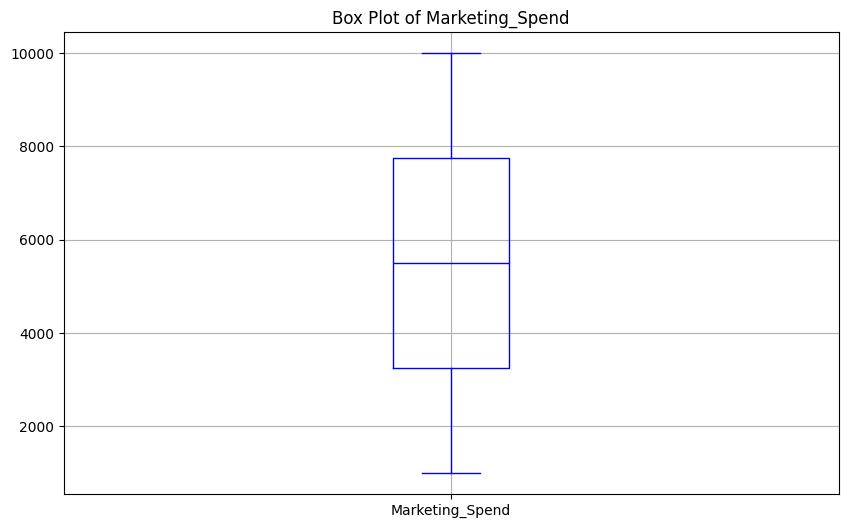

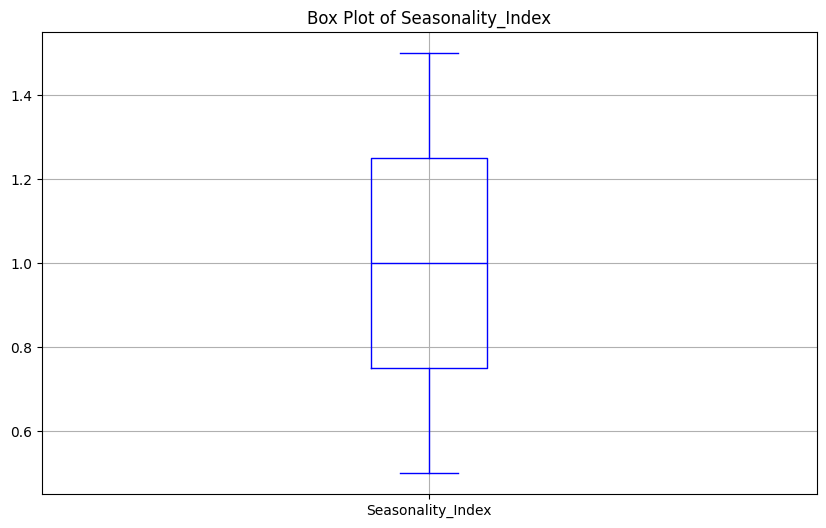

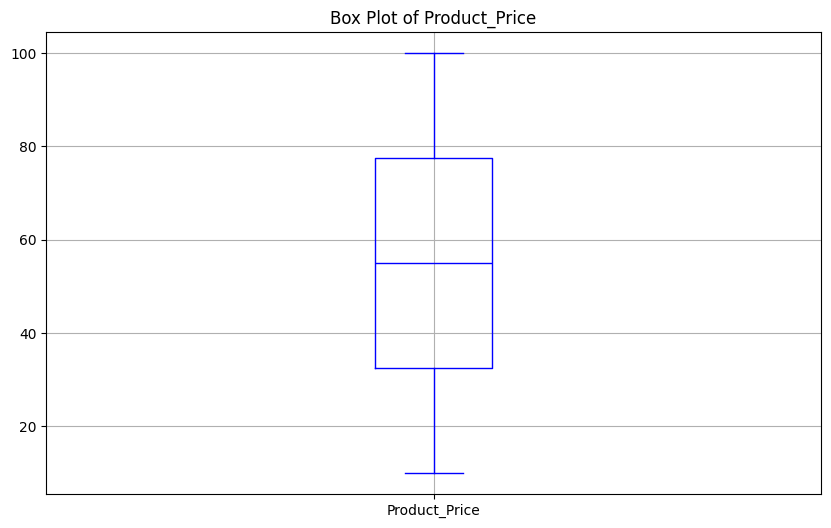

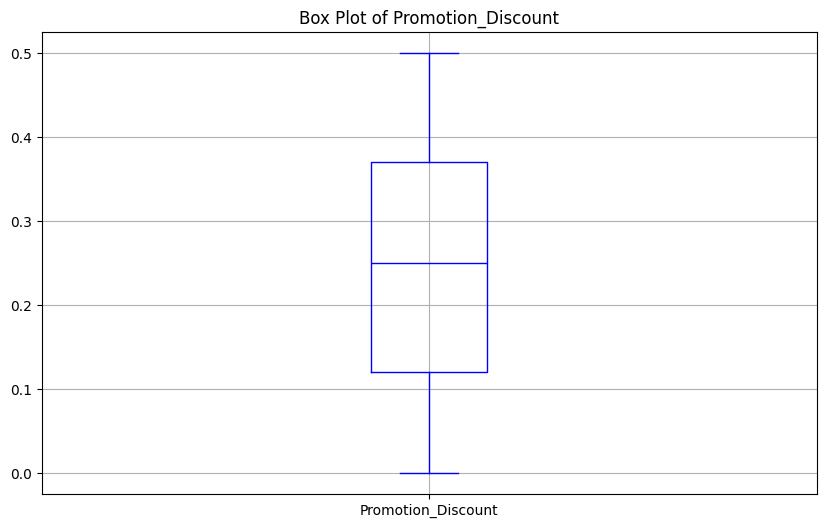

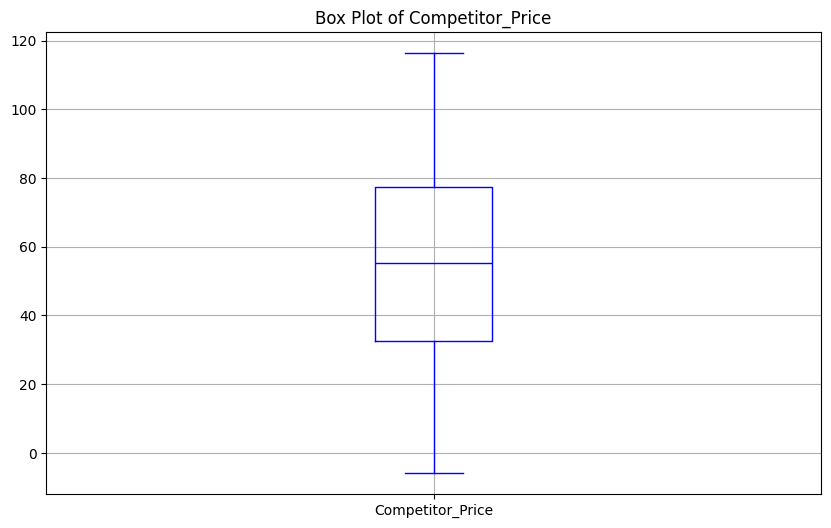

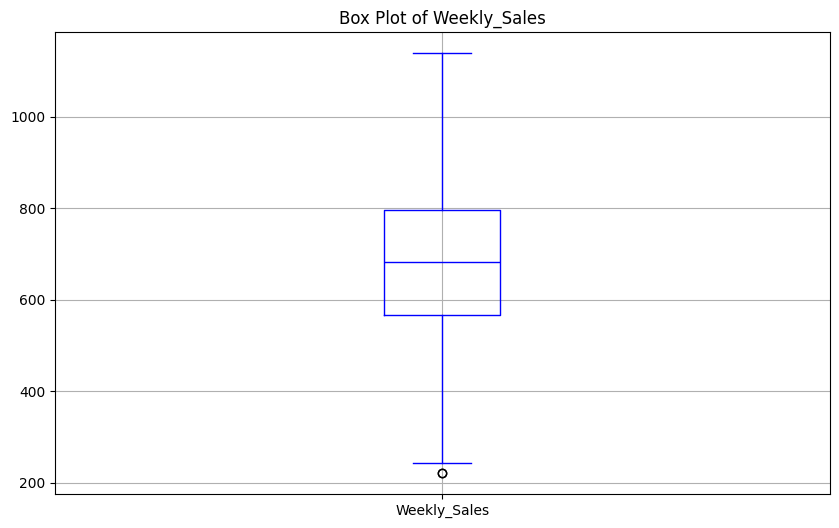

In [34]:
for i in range(len(num_features)):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=num_features[i], grid=True, color='blue')
    plt.title(f"Box Plot of {num_features[i]}")
    plt.show()

Let us assess the data for Skewness

In [35]:
from scipy.stats import skew

# Loop through numerical features and calculate skewness
for feature in num_features:
    # Drop missing values to avoid errors
    skewness = skew(df[feature].dropna())
    print(f"{feature}: {skewness}")

Marketing_Spend: -0.0008882863954619892
Seasonality_Index: -0.00445142200050568
Product_Price: -0.0035404812348354504
Promotion_Discount: 0.006150143276119447
Competitor_Price: -0.003605886876628083
Weekly_Sales: -0.004135689269987376


Let us visualize the skewness of numerical features

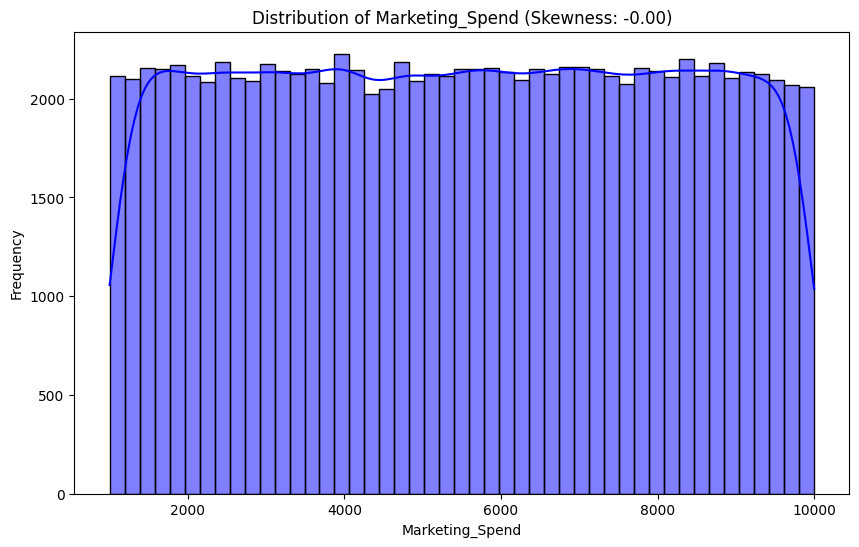

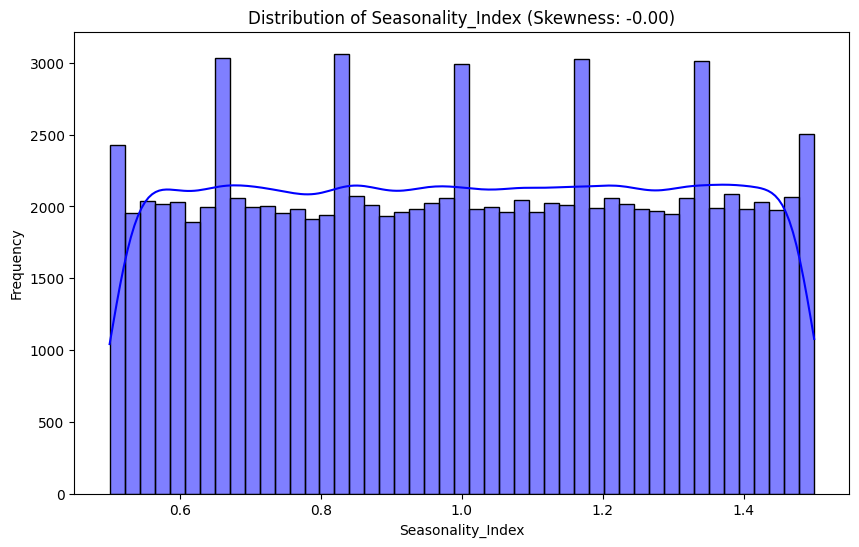

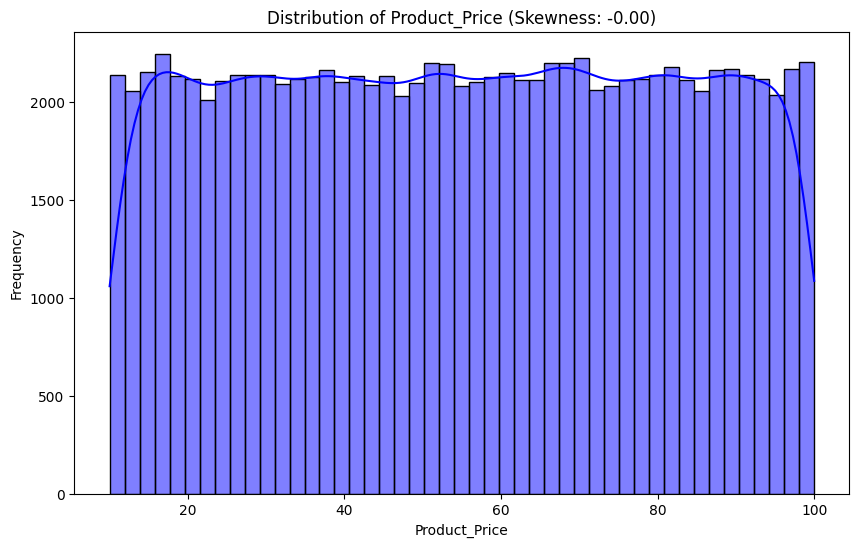

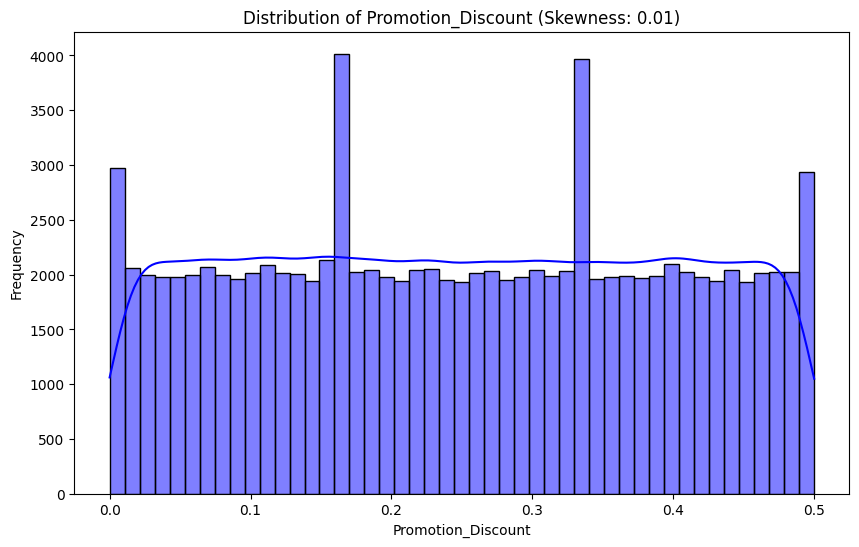

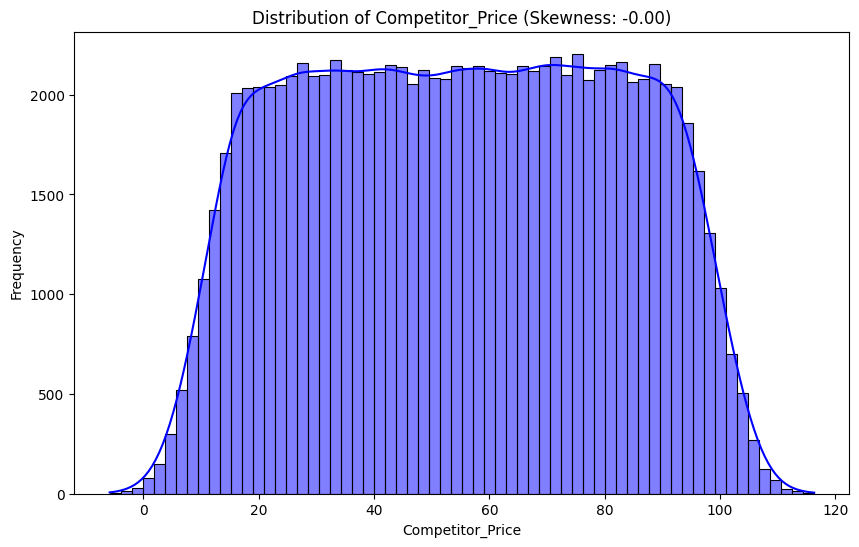

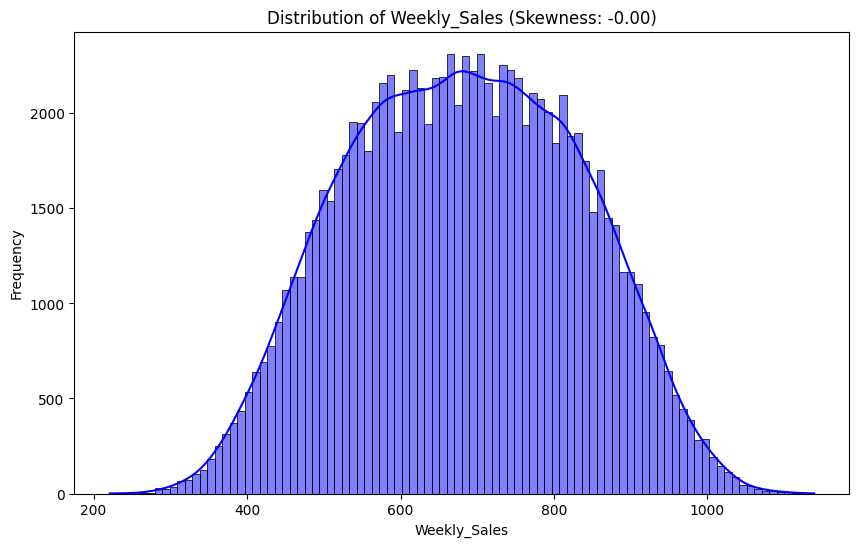

In [36]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f"Distribution of {feature} (Skewness: {skew(df[feature]):.2f})")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### Let us check the distributtion of categorical features

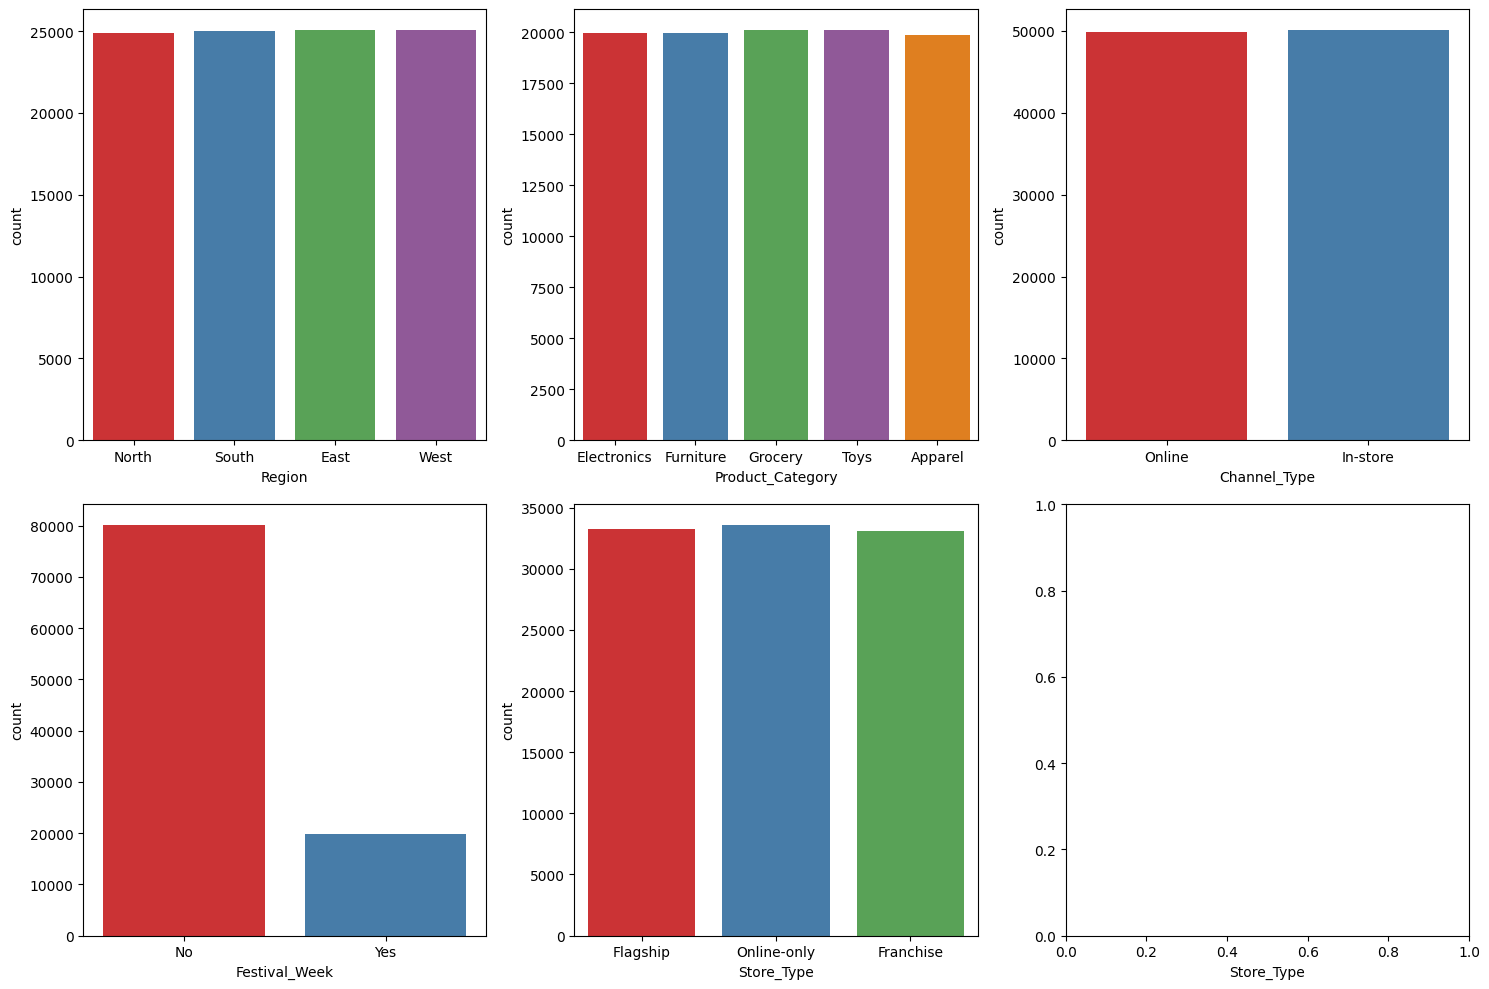

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.ravel() # flattening the array makes indexing easier
for col, ax in zip(cat_features, axes):
    sns.countplot(data = df, x = col, ax = ax, palette='Set1')
    plt.xlabel(col)
    fig.tight_layout()
plt.show()

In [43]:
num_features = num_features.drop('Weekly_Sales')
num_features

Index(['Marketing_Spend', 'Seasonality_Index', 'Product_Price',
       'Promotion_Discount', 'Competitor_Price'],
      dtype='object')

Let us perform Correlation Analysis between numerical features and target variable

#### Pearson + Spearman Correlation Matrix

In [47]:
# List of numerical features (excluding target if already included at the end)
num_features = ['Marketing_Spend', 'Seasonality_Index', 'Product_Price',
                'Promotion_Discount', 'Competitor_Price', 'Weekly_Sales']

# Pearson Correlation (for linear relationships)
pearson_corr = df[num_features].corr(method='pearson')['Weekly_Sales'].drop('Weekly_Sales').sort_values(ascending=False)
print("\n📊 Pearson Correlation with Weekly_Sales:\n", pearson_corr)

# Spearman Correlation (for monotonic relationships)
spearman_corr = df[num_features].corr(method='spearman')['Weekly_Sales'].drop('Weekly_Sales').sort_values(ascending=False)
print("\n📊 Spearman Correlation with Weekly_Sales:\n", spearman_corr)


📊 Pearson Correlation with Weekly_Sales:
 Marketing_Spend       0.869120
Seasonality_Index     0.038258
Promotion_Discount   -0.011832
Product_Price        -0.353960
Competitor_Price     -0.366402
Name: Weekly_Sales, dtype: float64

📊 Spearman Correlation with Weekly_Sales:
 Marketing_Spend       0.877387
Seasonality_Index     0.036185
Promotion_Discount   -0.011538
Product_Price        -0.335291
Competitor_Price     -0.346643
Name: Weekly_Sales, dtype: float64


Mutual Information (for Non-Linear Dependencies)

In [49]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Define features and target
X = df[num_features].drop(columns='Weekly_Sales')
y = df['Weekly_Sales']

# Compute mutual information
mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to Series for better display
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("\n📈 Mutual Information Scores with Weekly_Sales:\n", mi_scores_series)



📈 Mutual Information Scores with Weekly_Sales:
 Marketing_Spend       0.686725
Competitor_Price      0.095716
Product_Price         0.086125
Seasonality_Index     0.001670
Promotion_Discount    0.000000
dtype: float64


Scatter Plots (one for each numerical feature vs. Weekly_Sales)

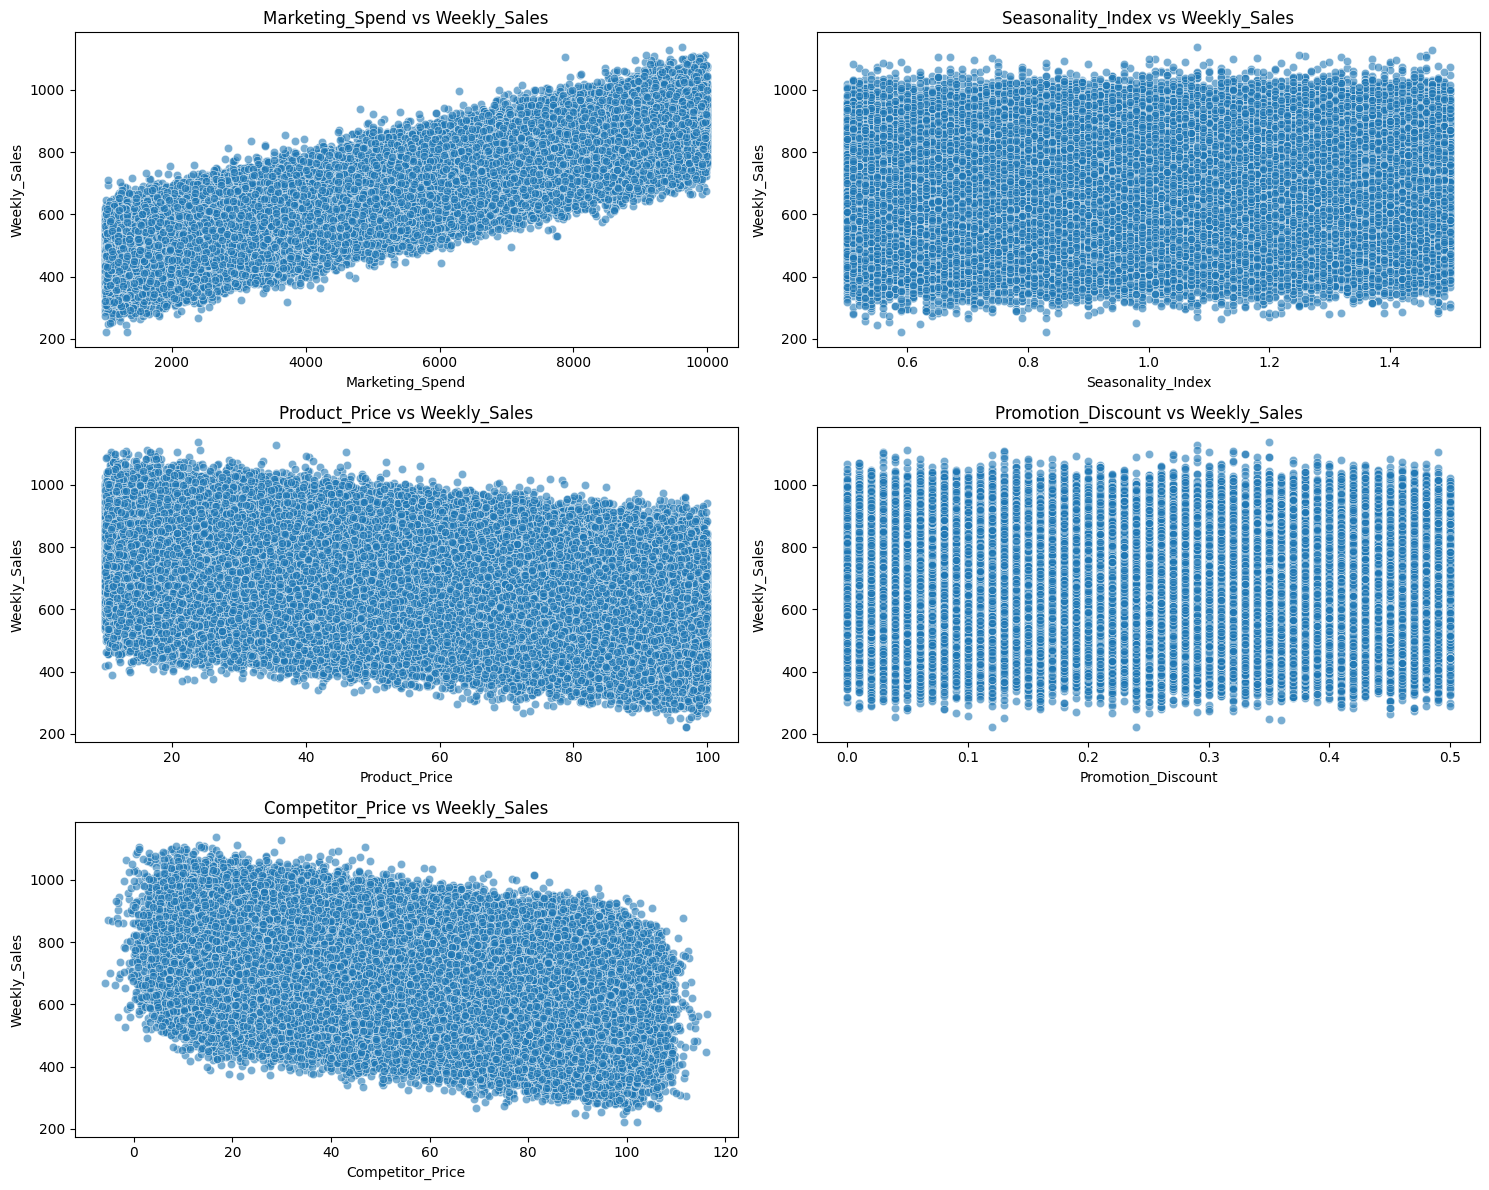

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting grid
plt.figure(figsize=(15, 12))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='Weekly_Sales', alpha=0.6)
    plt.title(f'{feature} vs Weekly_Sales')
    plt.xlabel(feature)
    plt.ylabel('Weekly_Sales')

plt.tight_layout()
plt.show()

In [51]:
cat_features

Index(['Region', 'Product_Category', 'Channel_Type', 'Festival_Week',
       'Store_Type'],
      dtype='object')

### Interpretation of Correlation & Mutual Information

| Feature                 | Pearson   | Spearman  | Mutual Info | 🔍 Interpretation                                                                |
| ----------------------- | --------- | --------- | ----------- | -------------------------------------------------------------------------------- |
| **Marketing\_Spend**    | **0.869** | **0.877** | **0.687**   | ✅ Strong **linear and monotonic** relationship; most informative.                |
| **Seasonality\_Index**  | 0.038     | 0.036     | 0.0016      | ❌ Almost no relationship.                                                        |
| **Promotion\_Discount** | -0.011    | -0.0115   | 0.0000      | ❌ No linear or non-linear relationship.                                          |
| **Product\_Price**      | -0.354    | -0.335    | 0.086       | ⚠️ Moderate negative correlation; some weak non-linear info.                     |
| **Competitor\_Price**   | -0.366    | -0.347    | 0.096       | ⚠️ Moderate negative correlation; slightly more informative than Product\_Price. |


### Key Insights:

- Marketing_Spend is the most powerful predictor of Weekly_Sales across all methods — it's your MVP feature.

- Product_Price and Competitor_Price show moderate negative correlation — as prices rise, sales tend to fall.

- Seasonality_Index and Promotion_Discount show little to no correlation or information gain — may not be valuable predictors as-is.



### Conclusion:

After conducting a comprehensive analysis, we have decided to drop
- Seasonality_Index
- Promotion_Discount

and keep
- Marketing_Spend
- Product_Price
- Competitor_Price

as our primary features for the regression model.

In [52]:
df = df.drop(columns = ['Seasonality_Index', 'Promotion_Discount'], axis = 1)
df.head()

,Marketing_Spend,Product_Price,Competitor_Price,Region,Product_Category,Channel_Type,Festival_Week,Store_Type,Weekly_Sales
0,4370.86,35.43,33.77,North,Electronics,Online,No,Flagship,682
1,9556.43,51.28,54.78,South,Furniture,In-store,No,Flagship,864
2,7587.95,18.93,13.97,East,Grocery,In-store,No,Flagship,1005
3,6387.93,50.22,49.40,North,Grocery,Online,No,Online-only,770
4,2404.17,28.28,34.36,North,Electronics,In-store,No,Franchise,596


In [54]:
df.to_csv("research_notebooks/01. Forecast/preprocessed_forecast_data.csv", index = False)